# Fordgobike Trip Data Exploration

## Preliminary Wrangling

The data set contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for approximately 183,400 trips within the month of February 2019

In [178]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

%matplotlib inline

In [179]:
# load in the dataset into a pandas dataframe, print statistics
trips = pd.read_csv("201902-fordgobike-tripdata.csv")

In [180]:
# high-level overview of data shape and composition
print(trips.shape)
trips.dtypes

(183412, 16)


duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [181]:
# overview of data
trips.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [182]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [183]:
trips.dropna(inplace=True)

In [184]:
# convert start_time and end_time to datetime
trips['start_time']= pd.to_datetime(trips['start_time'])
trips['end_time']= pd.to_datetime(trips['end_time'])

In [185]:
# convert start_station_id, end_station_id and bike_id to string
convertibles = ["start_station_id", "end_station_id", "bike_id"]
for ids in convertibles:
    
    trips[ids] = trips[ids].astype(int).astype('object')

In [186]:
# convert member_birth_year to integer
trips["member_birth_year"] = trips["member_birth_year"].astype(int)

In [187]:
trips.head()
trips.shape


(174952, 16)

In [188]:
# convert gender to categorical types
orders = ['Male', 'Female', 'Other']
categorical = pd.api.types.CategoricalDtype(ordered=True, categories = orders)
trips['member_gender'] = trips['member_gender'].astype(categorical)

In [189]:
pd.DataFrame(trips.groupby(['start_station_name'])['duration_sec'].mean().sort_values(ascending=False)).head(10)

,duration_sec
start_station_name,
San Antonio Park,2647.962264
Palm St at Willow St,2467.333333
Foothill Blvd at 42nd Ave,1859.478261
Empire St at 7th St,1789.785714
Fell St at Stanyan St,1706.942308
San Carlos St at Market St,1648.729730
Williams Ave at 3rd St,1637.000000
O'Farrell St at Divisadero St,1630.653226
Masonic Ave at Turk St,1618.245833


In [190]:
pd.DataFrame(trips.groupby(['end_station_name'])['duration_sec'].mean().sort_values(ascending=False)).head(10)

,duration_sec
end_station_name,
16th St Depot,26000.166667
Willow St at Vine St,3535.600000
Lane St at Revere Ave,2035.239130
Fell St at Stanyan St,1888.659864
Backesto Park (Jackson St at 13th St),1832.555556
San Antonio Park,1792.721311
Lombard St at Columbus Ave,1791.962801
Williams Ave at 3rd St,1782.040000
Palm St at Willow St,1738.285714


In [191]:
# descriptive statistics for numeric variables
trips.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [192]:
trips.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### What is the structure of your dataset?

There are 183,412 trips in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id', 'user_type, member_birth_year, member_gender, bike_share_for_all_trip). bike_share_for_all_trip, bike_id, user_type, member_birth_year, member_gender, start_station_id, start_station_name, start_station_latitude, start_station longutude, end_station_id, end_station_name, end_station_latitude and end_station longutude are categorical variables while duration_sec, start_time and end_time are quantitative data


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the duration of a trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the start time (time of the day and day of the week) will have the strongest effect on the travel duration: some hours of the day and some days of the week will have higher duaration. I also think that the user_type and member_gender will have effects on the duration, though to a much smaller degree than the start_time.

## Univariate Exploration

### What's the Frequency of Each Trip Duration
I'll start by looking at the distribution of the main variable of interest: duration.

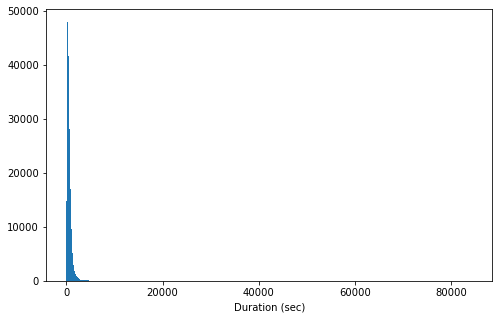

In [193]:
# start with a standard-scaled plot
binsize = 200
bins = np.arange(0, trips['duration_sec'].max(), binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = trips, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (sec)');


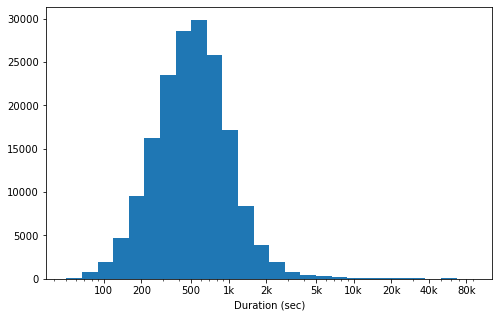

In [194]:
# there are high duration with very low frequency in the distribution, so let's put it on a log scale instead
log_binsize = 0.125
bins = 10 ** np.arange(1.7, np.log10(trips['duration_sec'].max())+log_binsize, log_binsize)
dur_val = [100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4]
dur_lab = [100, 200, 500, '1k', '2k', '5k', '10k', '20k', '40k','80k']
plt.figure(figsize=[8, 5])
plt.hist(data = trips, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks(dur_val, dur_lab)
plt.xlabel('Duration (sec)')
plt.show()

In the Histogram plot of trip duration, duration is skewed entirely to the left, with higher trips on the low duration end, and low trips on the high duration end. When plotted on a log-scale, the ride duration distribution is unimodal with the peak between 500 and 700.

### Hour Many Trips Was Taken Per Hour
Next up, the first predictor variable of duration: start time. The start time contains a number of information including 
hours of the day and days of the week. It also include days of the month. I will first consider the hour of the day

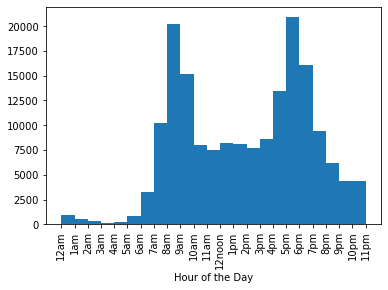

In [195]:
bins = np.arange(0, 24, 1)
a = []
for b in bins:
    if b == 0:
        a.append('12am')
    elif b<12:
        a.append(str(b)+'am')
    elif b==12:
        a.append('12noon')
    else:
        a.append(str(b-12) +'pm')
plt.hist(trips.start_time.dt.hour, bins=bins)
plt.xticks(bins, a)
plt.xticks(rotation=90)
plt.xlabel('Hour of the Day');

In the case of hour of the day, the highest number of rides were between 8am and 9am in the morning and also 5pm-6pm in the evening. Least rides were recorded at the early hours of the day

### How Many Trips Was Taken In a Week
I'll now move on to days of the week.

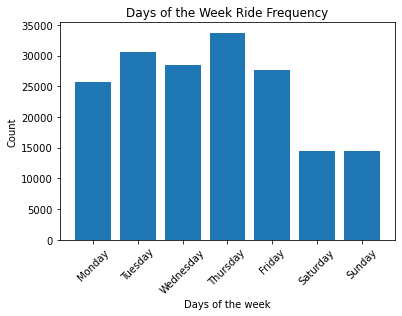

In [196]:
# ploting (days of the week) start_time
days = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_agg = trips.start_time.dt.isocalendar().day.value_counts().sort_values()
plt.bar(days_agg.index, days_agg)
plt.xticks([1,2,3,4,5,6,7],days)
plt.xticks(rotation=45);
plt.xlabel('Days of the week')
plt.ylabel('Count')
plt.title('Days of the Week Ride Frequency');

In the case of days of the week, the highest number of rides were on Thursday, followed by Tuesdays. Least number of rides were recorded on weekends 

### How Many Trip Was Taken Per Day
Next I will check the day to day(days in the month) ride frequency

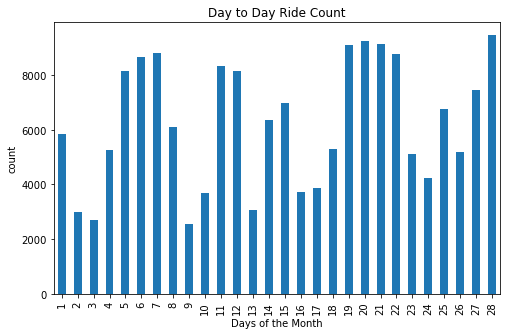

In [197]:
fig, ax = plt.subplots(figsize=[8,5])
trips.groupby(trips.start_time.dt.day)['duration_sec'].count().plot(kind='bar', ax=ax)
plt.ylabel('count')
plt.xlabel('Days of the Month')
plt.title('Day to Day Ride Count');

The is no general pattern in the day to day ride frequency. However, the most ride orders was made on the last day of the month.

### How many trip was Taken by Each Category (Gender, User Type and Trip Share)
I'll now move on to the categorical variables (user_type, bike_share_for_all_trip, member_gender,)

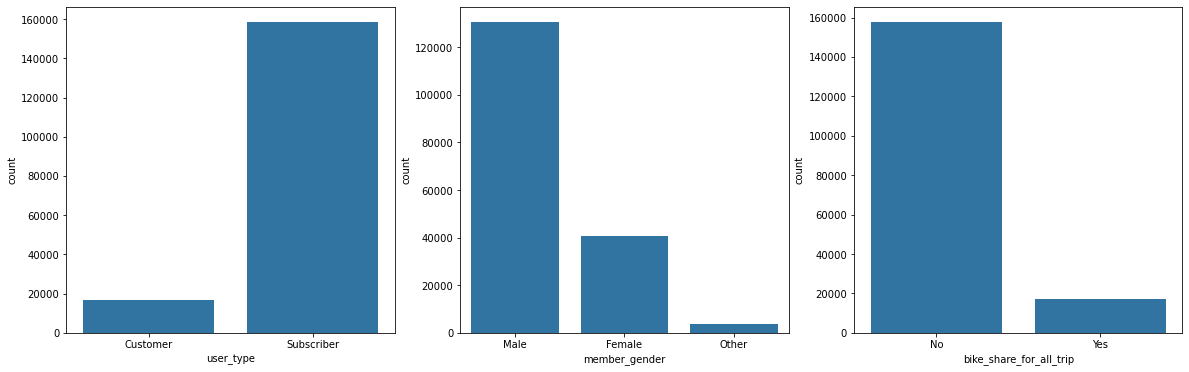

In [198]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(ncols=3, figsize = [20,6])
cat = ['user_type', 'member_gender','bike_share_for_all_trip']
c = 0
default_color = sb.color_palette()[0]
for var in cat:
    sb.countplot(data = trips, x = var, color = default_color, ax = ax[c])
    c=c+1
plt.show()

The number of trips made by subscribers is far greater than that made by customers. Also more men take bike rides than women and also few bike are shared for all trip.

### How Many Trip by Each Age Group
Now I will check how each age group take make bike orders

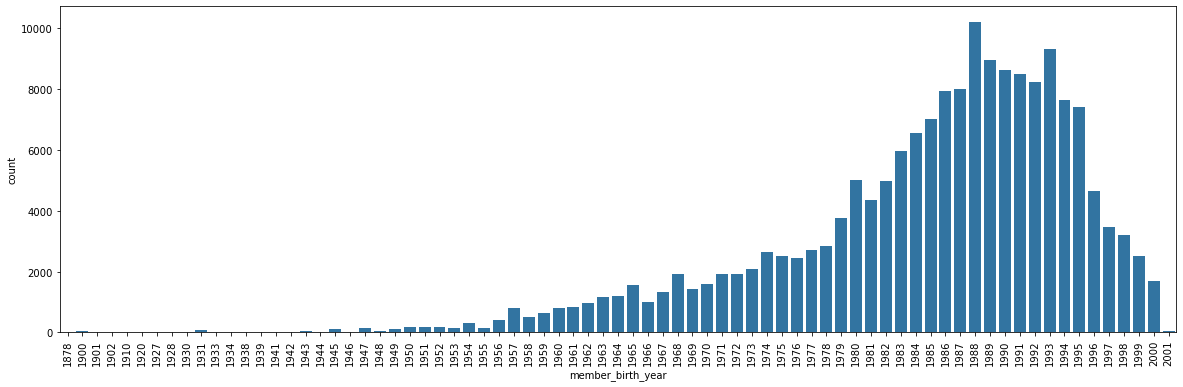

In [199]:
fig, ax = plt.subplots(figsize = [20,6])
sb.countplot(data = trips, x = 'member_birth_year', color = default_color, ax = ax)
plt.xticks(rotation=90)
plt.show()

There is somewhat gradual increase in trips made as the birth year increase up to 1988. Beyond 1988, number of trip made by each age group degreses with increasing birth year execept for those born in 1993. Those born in 1993 makes the second highest ride followed by 1989.

### Top 20 Start Stations
I'll now look at the other features in the data to see if any of them hold interesting properties
First i will look at the start stations.

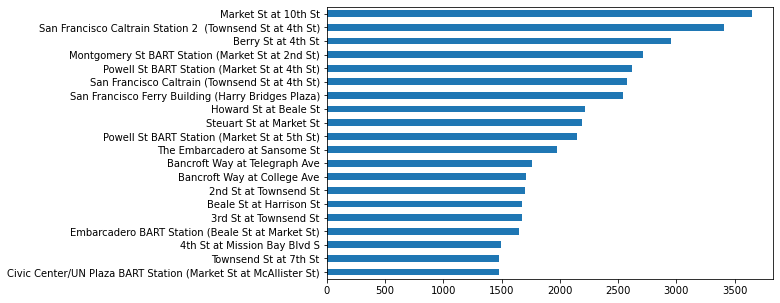

In [200]:
fig, ax = plt.subplots(figsize=[8,5])
# Take the top start stations with the highest volume of ride
top20_start_station = trips.start_station_name.value_counts().sort_values(ascending=False).head(20)

#plot a horizontal bargraph 
top20_start_station.sort_values().plot(kind="barh", ax=ax);

The highest rides order emanated from "Market St at 10th St" followed by "San Fransisco Caltrain Station 2".

### Top 20 End Stations
Next I will look at end stations

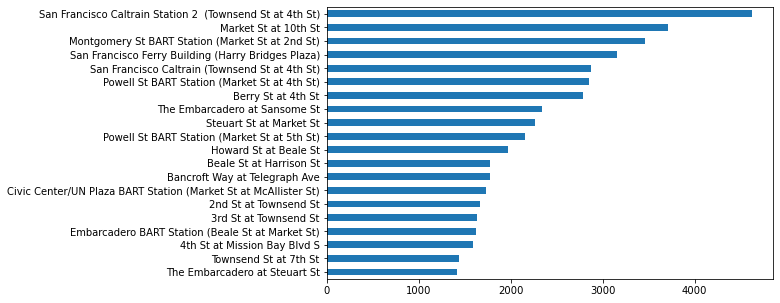

In [201]:
fig, ax = plt.subplots(figsize=[8,5])
# Take the top end stations with the highest volume of ride
top20_end_station = trips.end_station_name.value_counts().sort_values(ascending=False).head(20)
top20_end_station.sort_values().plot(kind="barh", ax=ax);

The highest ride destination were at "San Fransisco Caltrain Station 2" followed by "Market St at 10th St"

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal with the peak between \$500 and \$700 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Because there are over 400 unique start and end station, the 20 stations with the highest number of order ware selected  when investigating the start and end stations ride counts. 

## Bivariate Exploration


### What's the Trip Duration Per Week
To start off with, I want to look at the trend between days of the week and ride duration

In [202]:
def myboxplot(df, xvar, yvar):
    # Set plot dimensions 
    fig = plt.figure(figsize = [10,8])
    # plot bar plot
    ax = sb.boxplot(data = trips, x = xvar, y = yvar, color=sb.color_palette()[0])
    if len(xvar.unique()) == 24:
        plt.xticks(bins, a)
        plt.xticks(rotation=90)
        plt.xlabel('Hour of the Day'.title(), fontsize = 10, weight = 'bold')
        plt.ylabel('Duration (sec)'.title(), fontsize = 10, weight = 'bold')
        plt.title('Duration in Different Hours'.title(), fontsize = 14, weight = 'bold')
    elif len(xvar.unique()) == 7:
        plt.xticks([0,1,2,3,4,5,6], days)
        plt.xticks(rotation=45)
        plt.xlabel('Days of the Week'.title(), fontsize = 10, weight = 'bold')
        plt.ylabel('Duration (sec)'.title(), fontsize = 10, weight = 'bold')
        plt.title('Duration in Different Days'.title(), fontsize = 14, weight = 'bold')
    else:
        plt.xlabel('Days of the Month'.title(), fontsize = 10, weight = 'bold')
        plt.ylabel('Duration (sec)'.title(), fontsize = 10, weight = 'bold')
        plt.title('Duration in Different Days'.title(), fontsize = 14, weight = 'bold')
    plt.show();

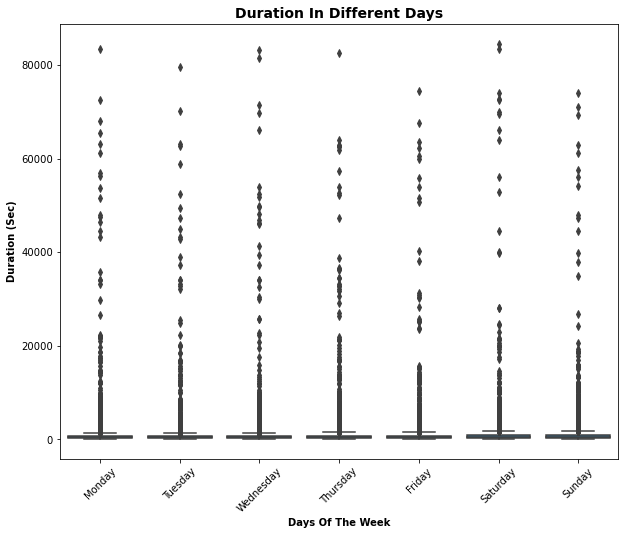

In [203]:
myboxplot(trips, trips.start_time.dt.isocalendar().day, 'duration_sec')

There are high duration with very low frequency in the distribution, so let's put it on a log scale instead

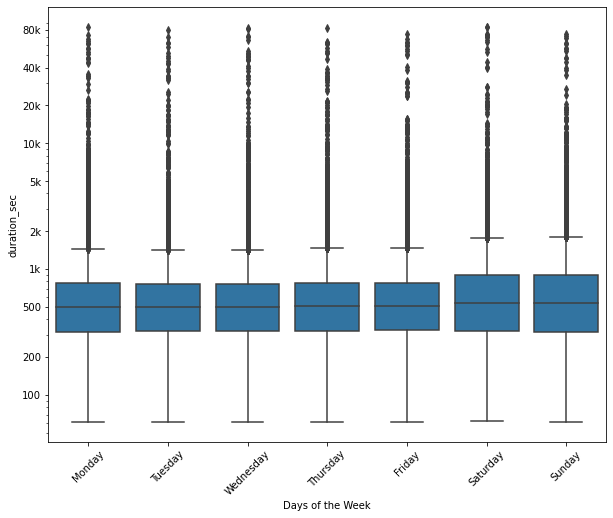

In [204]:
# Explore the distribution of trip duration for each day of the week on a logarithm scale using box plot
fig = plt.figure(figsize = [10,8])
sb.boxplot(data=trips, x=trips.start_time.dt.isocalendar().day, y='duration_sec', color=default_color)
plt.yscale('log')
plt.xticks([0,1,2,3,4,5,6], days)
plt.xlabel('Days of the Week')
plt.xticks(rotation=45)
plt.yticks(dur_val, dur_lab);

Interestingly, it appears that the distribution of duartion is almost uniform throughout the days of the week

### What's the Average Trip Duration Per Week
Lets look further at the mean duration for each day.

In [205]:
def mybarplot(df, xvar, yvar):
    # Set plot dimensions 
    fig = plt.figure(figsize = [15,7])
    # plot bar plot
    ax = sb.barplot(data = trips, x = xvar, y = yvar, color=sb.color_palette()[0])
    if len(xvar.unique()) == 24:
        plt.xticks(bins, a)
        plt.xticks(rotation=90)
        plt.xlabel('Hour of the Day'.title(), fontsize = 10, weight = 'bold')
        plt.ylabel('Mean Duration'.title(), fontsize = 10, weight = 'bold')
        plt.title('Mean Duration in Different Hours'.title(), fontsize = 14, weight = 'bold')
    elif len(xvar.unique()) == 7:
        plt.xticks([0,1,2,3,4,5,6], days)
        plt.xticks(rotation=45)
        plt.xlabel('Days of the Week'.title(), fontsize = 10, weight = 'bold')
        plt.ylabel('Mean Duration'.title(), fontsize = 10, weight = 'bold')
        plt.title('Mean Duration in Different Days'.title(), fontsize = 14, weight = 'bold')
    else:
        plt.xlabel('Days of the Month'.title(), fontsize = 10, weight = 'bold')
        plt.ylabel('Mean Duration'.title(), fontsize = 10, weight = 'bold')
        plt.title('Mean Duration in Different Days'.title(), fontsize = 14, weight = 'bold')
    plt.show();

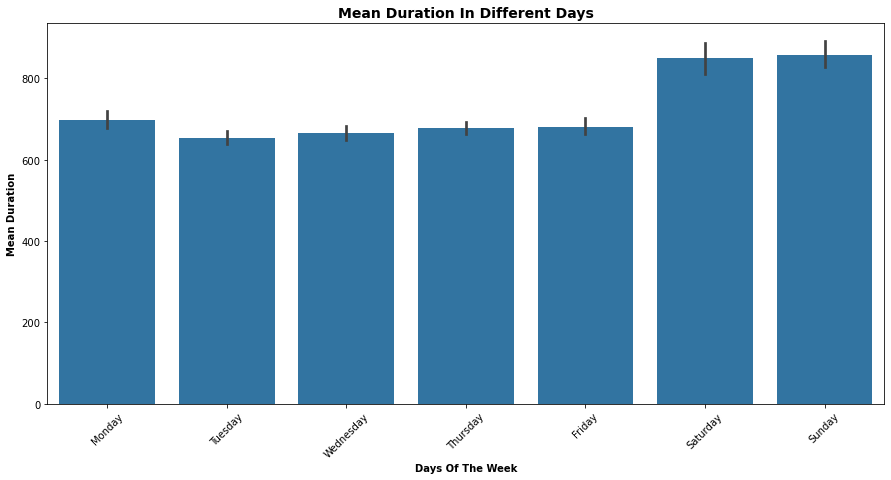

In [206]:
mybarplot(trips, trips.start_time.dt.isocalendar().day, trips.duration_sec)

Though the distribution of duration for the days appears to be uniform and the total number of ride is least at weekends, the mean duration is highest in the weekend.


###  What's the Hourly Trip Duration
With the preliminary look at bivariate relationships between days of the week and duration of trip out of the way, I want to dig into some of the relationships more. First, I want to see how hour of the day and duration are related

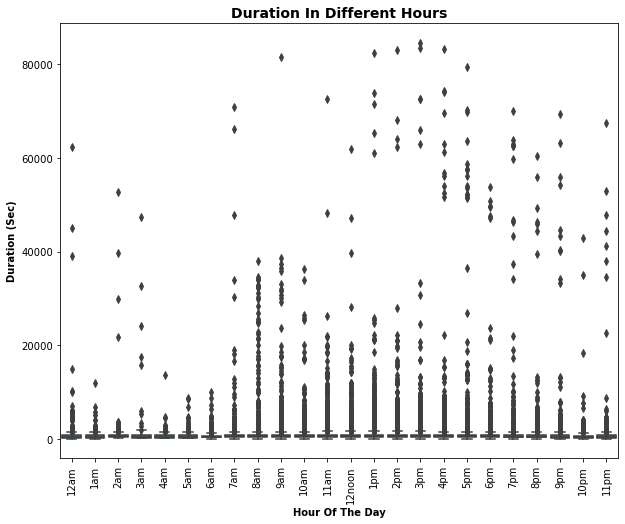

In [207]:
# Explore the distribution of trip duration for each hour of the day using box plot
myboxplot(trips, trips.start_time.dt.hour, 'duration_sec')

There are high duration with very low frequency in the distribution, so let's put it on a log scale instead

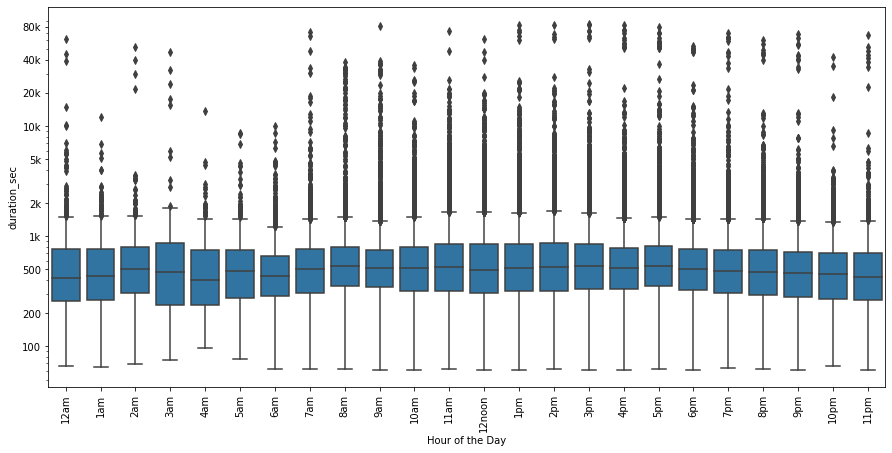

In [208]:
# Explore the distribution of trip duration on a log scale for each hour of the day using box plot
fig, ax = plt.subplots(figsize=[15,7])
bins = np.arange(0, 24, 1)
sb.boxplot(data=trips, x=trips.start_time.dt.hour, y='duration_sec', color = default_color, ax=ax)
plt.xticks(bins, a)
plt.xlabel('Hour of the Day')
plt.xticks(rotation=90)
plt.yscale('log')
plt.yticks(dur_val, dur_lab)
plt.show();

It appears that the distribution of duartion is almost uniform throughout the hours

### What's the Average Hourly Duration
Lets look further at the mean duration for each hour.

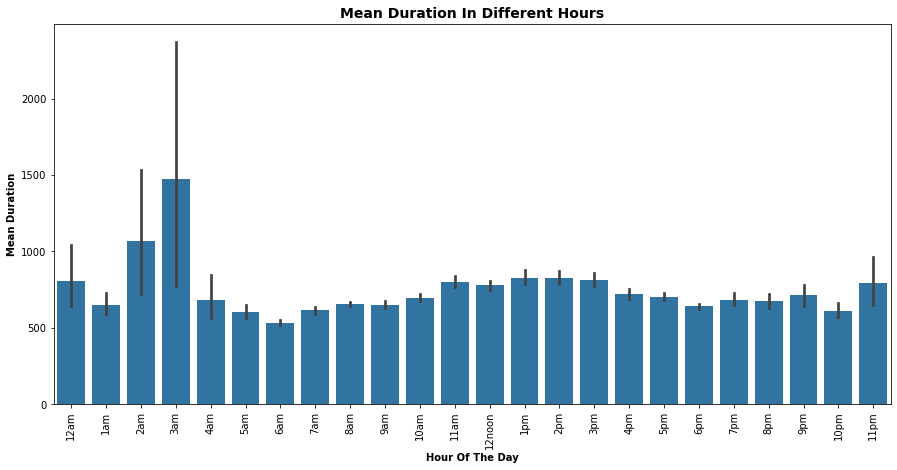

In [209]:
# Make a bar plot to find the average duration travel for every hour of the day
mybarplot(trips, trips.start_time.dt.hour, trips.duration_sec)

Though the distribution of duration for each hour appears to be uniform, the mean duration is greatest at 3am in the morning.

### What's the Average Daily Duration
Next Let's look further at the mean duration for each day of the month.

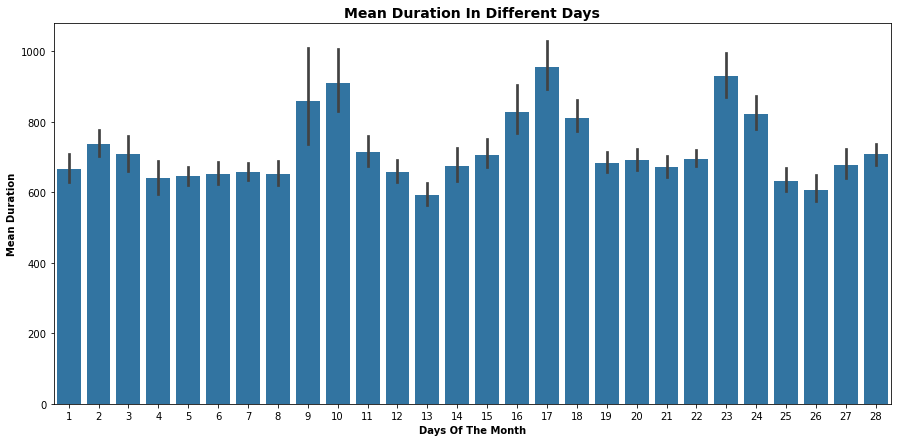

In [210]:
# Make a bar plot to find the average duration travel for each day in the month of february
mybarplot(trips, trips.start_time.dt.day, trips.duration_sec)

The mean trip duration is highest on the 17th of the month, followed by 23rd and 10th.

### What's the Trip Duration by Categories
Next I will look at how trip duration correlate with the categorical variables (namely; gender, usertype and bike share for all trip.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

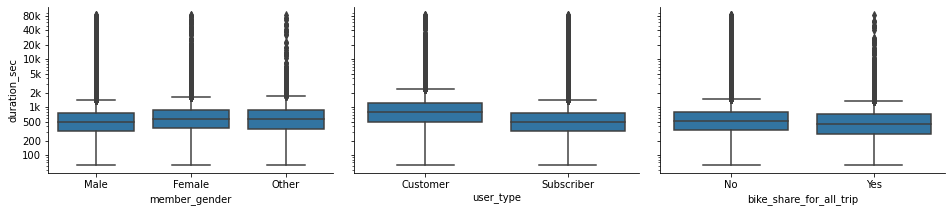

In [211]:
# Explore the distribution of duration for each categories using duration log scale 
plt.figure(figsize = [10, 10])
default_color = sb.color_palette()[0]
g = sb.PairGrid(data = trips, y_vars = ['duration_sec'], 
                x_vars = (['member_gender', 'user_type', 'bike_share_for_all_trip']),
                size = 3, aspect = 1.5)
g.map(sb.boxplot, color= default_color)
plt.yscale('log')
plt.yticks(dur_val, dur_lab)
plt.show();

People register as "other" sex type appears to have a slight number of high duration trips, compared to Female and male. Also Customers takes high duration trips compared to subscribers with the distribution between those that take bike share for all trip and those that did not almost the same.

### What's the Average Trip by Category
I will look further at the mean duration for the different categories.

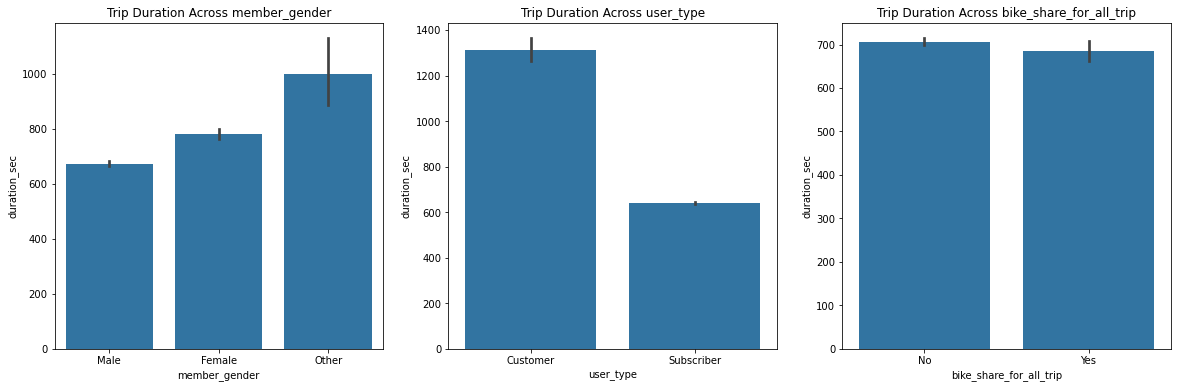

In [212]:
# make the bar plot for the different categories using the loop function
fig, ax = plt.subplots(ncols=3, figsize = [20,6])
cat = ['member_gender','user_type', 'bike_share_for_all_trip']
c = 0
default_color = sb.color_palette()[0]
for var in cat:
    sb.barplot(data = trips, x = var, y = "duration_sec", color = default_color, ax = ax[c])
    ax[c].set_title('Trip Duration Across'+ " " +var)
    c=c+1
plt.show()

The mean trip duration is highest among others, followed by Female and then Male.
Customers have higher mean trip duration time compared with Subscribers.

### What's the Weekly Trip Duration by Different Categories
Next, I will dig deeper into the frequency of duration travel by each categeories in the different days of the week

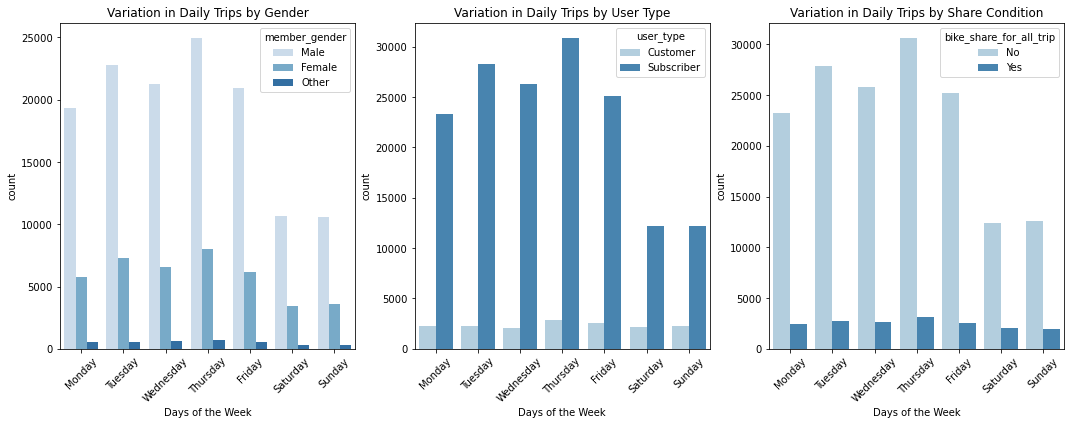

In [213]:
fig, ax = plt.subplots(ncols=3, figsize = [18,6])

sb.countplot(data = trips, x = trips.start_time.dt.isocalendar().day, hue = 'member_gender', palette = 'Blues', ax=ax[0])
ax[0].set_xticklabels(days, rotation =45)
ax[0].set_xlabel('Days of the Week')
ax[0].set_title('Variation in Daily Trips by Gender')

sb.countplot(data = trips, x = trips.start_time.dt.isocalendar().day, hue = 'user_type', palette = 'Blues', ax=ax[1])
ax[1].set_xticklabels(days, rotation=45)
ax[1].set_xlabel('Days of the Week')
ax[1].set_title('Variation in Daily Trips by User Type')

sb.countplot(data = trips, x = trips.start_time.dt.isocalendar().day, hue = 'bike_share_for_all_trip', palette = 'Blues', ax=ax[2])
ax[2].set_xticklabels(days, rotation=45)
ax[2].set_xlabel('Days of the Week')
ax[2].set_title('Variation in Daily Trips by Share Condition')

plt.show()

Every days of the week, the number of male bike riders is highest followed by Female and others. Also, every day of the week seeshigher number of subscribers than customers

### What's the Average Weekly Trip Duration by Gender
Next I will look at the mean duartion travel by each category

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1368x720 with 0 Axes>

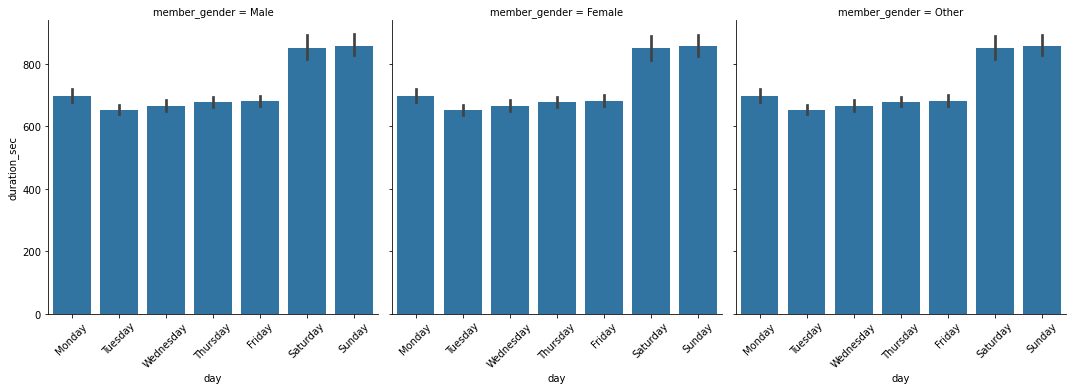

In [214]:
# create barplot for the different categories across the days of the week
plt.figure(figsize = [19, 10])
g = sb.FacetGrid(data = trips, col = 'member_gender',size=5)
ax = g.map(sb.barplot, x=trips.start_time.dt.isocalendar().day, y=trips.duration_sec)
plt.xticks([0,1,2,3,4,5,6], days)
ax.set_xticklabels(rotation=45)
plt.ylabel('Mean Duration (sec)');

The mean duration for the gender categaory is highest on weekends followed by Mondays regardless of the gender. 

## What's the Average Weekly Trip Duration by Member Type
Next I will look at that of User Type

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x504 with 0 Axes>

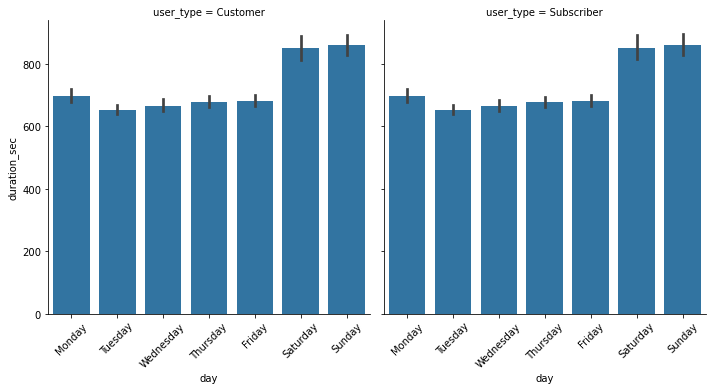

In [215]:
plt.figure(figsize = [15, 7])
g = sb.FacetGrid(data = trips, col = 'user_type',size=5)
ax = g.map(sb.barplot, x=trips.start_time.dt.isocalendar().day, y=trips.duration_sec)
plt.xticks([0,1,2,3,4,5,6], days)
ax.set_xticklabels(rotation=45)
plt.ylabel('Mean Duration (sec)');

The mean duration for both customers and subscribers are both highest on weekends followed by Mondays.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

While the least count of rides are recorded on weekends (Saturday and Sunday), the average duration of trips were recorded during the weekends. Also, while the highest volume of rides were recorded between 8-9am in the morning and 5-6pm in the evening, the highest mean duration was recorded by 3am in the morning. Meanwhile the mean trip duration is highest on the 17th of the month even though the highest number of trips were on the 28th.

When the distribution of trip duration is plotted against the timeframes (hours and days) using boxplot, there are high durations with very low frequency in the distribution, so I used a log scale instead. Using log scale, there isn't a huge distinct patterns or distribution across the timeframes for the start time.


The number of trips taken for each gender increase from male to female to others, however, the average trip duration increases in the other way round from others to female to male. Also eventhough subcribers takes the highest number of trips for the user type, customers have the highest average trip duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Thrughout the days of the week, male users takes the highest number of trips followed by female then others. This trend is the same for member type as subscriber takes the highest trip throughout the days of the week. 
Also for each gender type, daturdays and sundays sees the highest average duration.


## Multivariate Exploration

### What's the Weekly Trip Duration by Categories
The main thing I want to explore in this part of the analysis is how the three categorical play into the relationship between duration and start time.

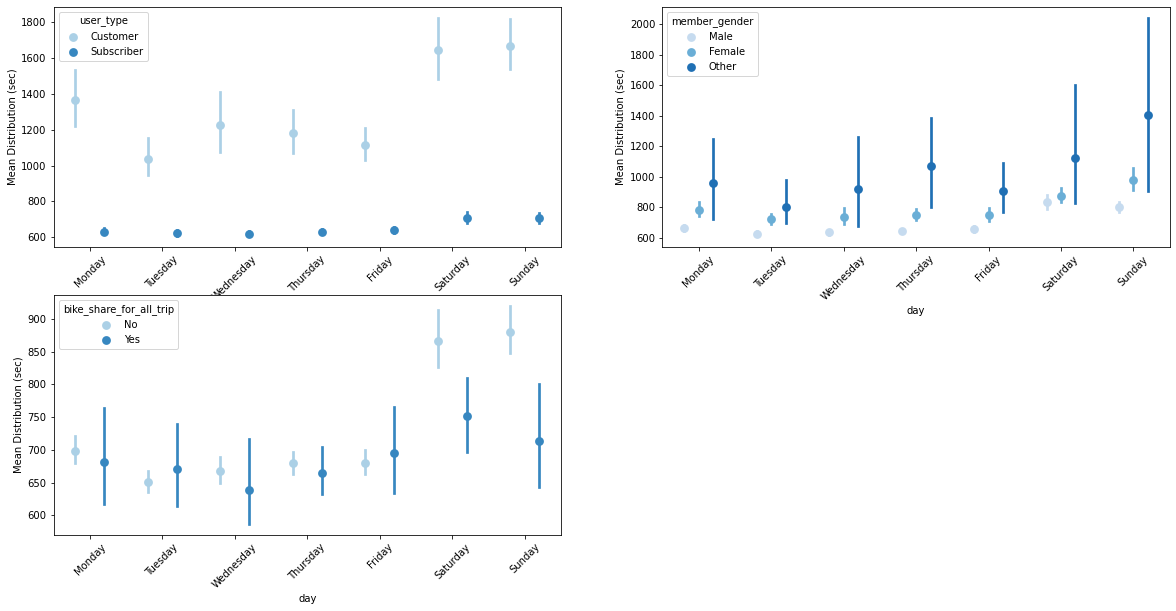

In [216]:
fig = plt.figure(figsize = [20,15])

plt.subplot(3,2,1)
ax = sb.pointplot(data = trips, x = trips.start_time.dt.isocalendar().day , y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks([0,1,2,3,4,5,6], days)
plt.xticks(rotation=45)
plt.ylabel('Mean Distribution (sec)')

plt.subplot(3,2,2)
ax = sb.pointplot(data = trips, x = trips.start_time.dt.isocalendar().day , y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks([0,1,2,3,4,5,6], days)
plt.xticks(rotation=45)
plt.ylabel('Mean Distribution (sec)')
plt.subplot(3,2,3)
ax = sb.pointplot(data = trips, x = trips.start_time.dt.isocalendar().day , y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks([0,1,2,3,4,5,6], days)
plt.xticks(rotation=45)
plt.ylabel('Mean Distribution (sec)')
plt.show();

For the different categories, the mean duration is highest on weekends. For each days of the week, customers have the highest mean duration compared to subscribers and also riders that have their gender registered as others have the highest mean trip duration followed by female then male. However, for the bike share, Tuesday and Friday have the mean duartion for people who shared their ride for all trip greater than people who did not.

### ### What's the Hourly Trip Duration by Categories

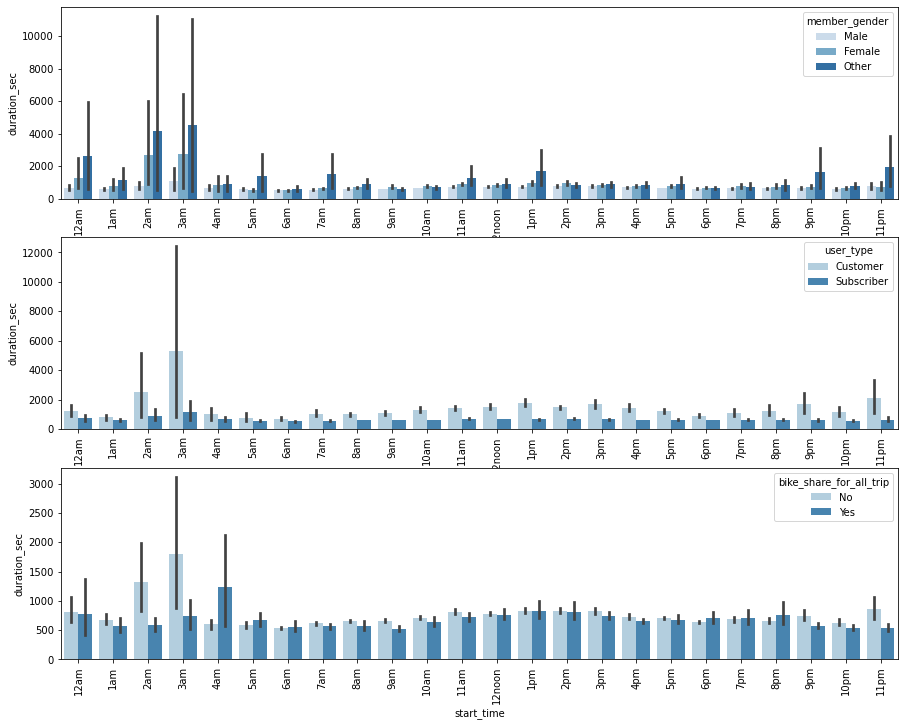

In [217]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [15, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.barplot(data = trips, x = trips.start_time.dt.hour, y= 'duration_sec', hue = 'member_gender', palette = 'Blues')
plt.xticks(bins, a)
plt.xticks(rotation=90)

plt.subplot(3, 1, 2)
sb.barplot(data = trips, x = trips.start_time.dt.hour, y= 'duration_sec', hue = 'user_type', palette = 'Blues')
plt.xticks(bins, a)
plt.xticks(rotation=90)

plt.subplot(3, 1, 3)
sb.barplot(data = trips, x = trips.start_time.dt.hour, y= 'duration_sec', hue = 'bike_share_for_all_trip', palette = 'Blues')
plt.xticks(bins, a)
plt.xticks(rotation=90);

Throughout the hours of the day, the average mean duartion is highest among those who classifies as other gender type and least among male. Similar trend is noticed in the user type category where Customers have the highest mean duration throughout the hours of the day.

However, for the Bike share for all trip category, at 5am, 6am, 6pm, 7pm and 8pm, more people shared their ride for all trip